# Linear Regression

- Given a function f(x) we want to find the value of x that minimizes f

### Implementation of the graient descent algorithm (in general )

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x=np.arange(10)# returns list
y=(x-5)**2
print(x,y)

[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


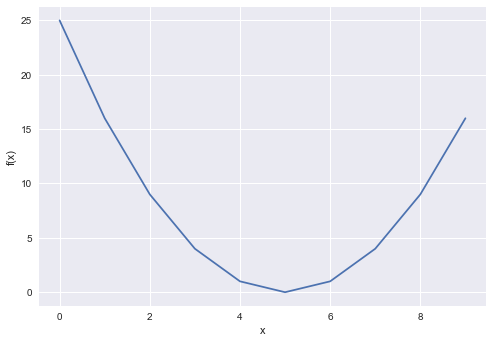

In [4]:
plt.style.use('seaborn')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

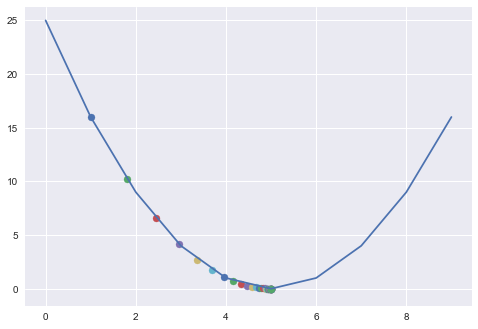

In [13]:
X=0
learning_rate=0.1
error=[]
plt.plot(x,y)
# take 50  steps in the downhill direction
for _ in range(50):
    gradient=2*(X-5)
    X=X - learning_rate*gradient
    e=(X-5)**2
    error.append(e)
    plt.scatter(X,e)
   # print(X)
   
    
    

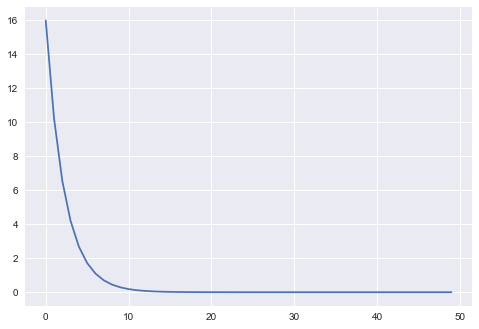

In [14]:
plt.plot(error)


# Hardwork pays off

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and read the data 
- Download
- Load 
- Visualise
- Normalise

In [2]:
x=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

# convert x and y to numpy arrays
x=x.values
y=y.values

# Normalisation( only the x values and not the y values)
x_mean=x.mean()
x_standardDev=x.std()
print(x_mean,x_standardDev)
x=(x-x_mean)/x_standardDev


-0.03779466168006855 0.9920801322508517


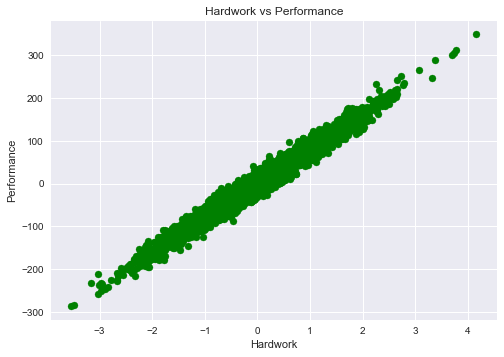

In [3]:
plt.style.use('seaborn')
plt.scatter(x,y,color='Green')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.title('Hardwork vs Performance')
plt.show()

In [4]:
x.shape,y.shape

((3750, 1), (3750, 1))

# Section II (Linear Regression)

In [19]:
def hypothesis(x,theta):
    #theta=[theta0 theta1]
    y_=theta[0]+theta[1]*x
    return y_

def gradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for _ in range(m):
        X=x[_]
        y_=hypothesis(X,theta)
        Y=y[_]
        grad[0]+=(y_ - Y)
        grad[1]+=(y_ - Y)*X
    return grad/m

def error(x,y,theta):
    m=x.shape[0]
    total_error=0.0
    for _ in range(m):
        y_=hypothesis(x[_],theta)
        total_error+=(y_ - y[_])**2
    return total_error/m

def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    for _ in range(max_steps):
        # compute gradient
        grad=gradient(x,y,theta)
        #compute error 
        e=error(x,y,theta)
        error_list.append(e)
        # update theta
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list    

In [20]:
theta,error_list=gradientDescent(x,y)

In [21]:
theta


array([ 0.6838508 , 79.90361453])

In [22]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

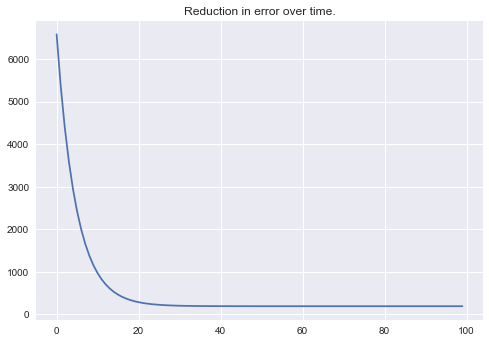

In [24]:
plt.plot(error_list)
plt.title('Reduction in error over time.')
plt.show()

## Predictions and best lines

In [25]:
y_=hypothesis(x,theta)

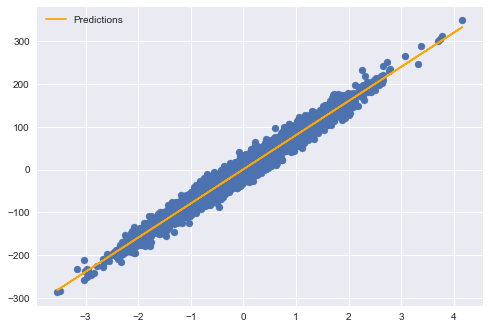

In [27]:
plt.scatter(x,y)
plt.plot(x,y_,color="Orange",label='Predictions')
plt.legend()
plt.show()

### Now load the test data 

In [29]:
x_test=pd.read_csv('Linear_X_Test.csv')
x_test=x_test.values
y_test=hypothesis(x_test,theta)

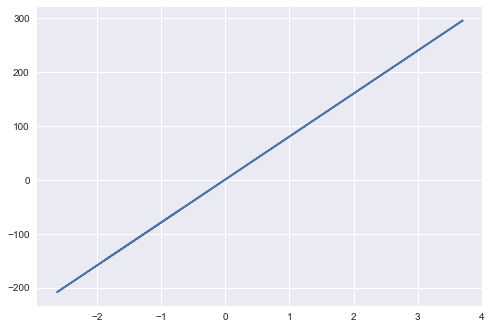

In [30]:
plt.plot(x_test,y_test)

In [33]:
# write into csv file
df=pd.DataFrame(data=y_test,columns=['y'])
df.to_csv('y_predictions.csv',index=False)

### To compute score
- score:R2(R squared) or cefficient of determination

In [34]:
def r2_score(y,y_):
    # Instead of using a loop np.sum is recomended
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score*100

In [36]:
r2_score(y,y_)

97.09612226971643

m